In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
"""input parameters"""
freq = 0.2 # frequency
duration = 1024 # total duration of the TS, duration = N*dt
fs = 2 # sampling frequency 

In [3]:
"""Step 1: generating a time vector from 0 to (duration - dt), equally spaced"""
dt = 1/fs # time difference between consecutive samples
t = np.arange(0,duration,dt) # time

"""Step 2: generating a water surface TS with an amplitude of -.5m  and a frequency
of 0.2Hz (period = 5sec)"""
Eta = 0.5*np.cos(2*np.pi*freq*t)
rnd = 0.01+(0.1-(-0.1))*np.random.rand(len(t)) # uniformly distributed random signal [-0.1m and 0.1m]
Eta = Eta+rnd # adding random signal to sinosoidal signal

Eta = sp.signal.detrend(Eta) # detrending data

In [4]:
""" Step 3: generating a frequency vector"""
N = len(Eta) # lenght of TS
df = fs/N # frequency difference beteen consecutive samples
f = np.arange(0,fs/2+df,df) # freq vector from 0 to fs/2 Hz, equally spaced at df

In [5]:
""" Step 4: Fast Fourier Transform (FFT)"""

# of the water surface elevation from f = 0Hz to f = fs Hz"""
EtaFFT = np.fft.fft(Eta)

# of the water surface elevation from f = 0Hz to fNY = fs/2 Hz"""
EtaFFT = EtaFFT[0:len(f)] # (N/2+1) elements if N is even; (N+1)/2 elements if N is odd 

# Half of the two sided power spectral density (psd) from f = 0Hz to fNy=fs/2 Hz
psdEta_2Sided=(1/(N*fs))*(np.absolute(EtaFFT))**2 # calculating psd using fs in (m^2/Hz)

# one psd density from f = 0Hz to fNy=fs/2 Hz
psdEta_1Sided=psdEta_2Sided.copy()
psdEta_1Sided[0:-1]= 2.*psdEta_1Sided[0:-1] 
# ^ onde-sided-spectrum = 2 * two-sided-spectrum in (m^2/Hz)

(0.0, 1.0)

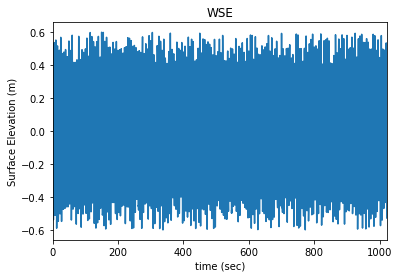

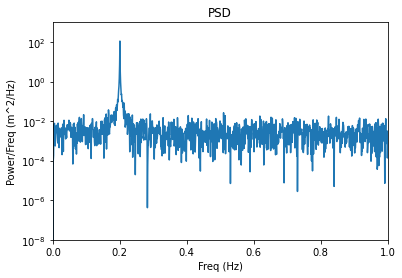

In [10]:
## plotting WSE
plt.figure(1)
plt.plot(t,Eta)
plt.title('WSE')
plt.xlabel('time (sec)')
plt.ylabel('Surface Elevation (m)')
plt.xlim([t[0],t[-1]])

## plotting psd
plt.figure(2)
plt.semilogy(f,psdEta_1Sided)
plt.title('PSD')
plt.xlabel('Freq (Hz)')
plt.ylabel("Power/Freq (m^2/Hz)")
plt.ylim([0.00000001,1000])
plt.xlim([f[0],f[-1]])